In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

drug_data = pd.read_csv("./data/mouse_drug_data.csv")
drug_data.head()

clinical_trial_data = pd.read_csv("./data/clinicaltrial_data.csv")
clinical_trial_data.head()

# Combine the data into a single dataset

merge_data_df = pd.merge(clinical_trial_data, drug_data, how='inner', on='Mouse ID').drop_duplicates()

# Display the data table for preview

merge_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

subset_df = merge_data_df.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]

mean_tumor_vol = subset_df.groupby(["Drug", "Timepoint"]).mean()
mean_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

stderror_tumor_vol = subset_df.groupby(["Drug", "Timepoint"]).sem()
stderror_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

pivot_table = mean_tumor_vol.reset_index().pivot(index="Timepoint", columns="Drug", 
                                                values="Tumor Volume (mm3)")

pivot_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
###

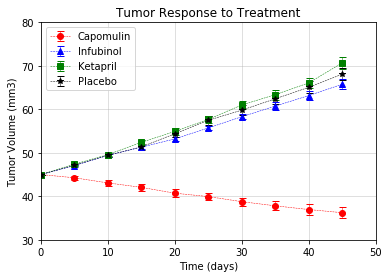

In [14]:
# Generate the Plot (with Error Bars)
# Save the Figure

ax = plt.subplot(111)

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


# Plot x-axis vs mean tumor volume values with error

ax.errorbar(x_axis, mean_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"],
            fmt="o", color="Red", linestyle="--", label="Capomulin", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"],
            fmt="^", color="Blue", linestyle="--", label="Infubinol", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"],
            fmt="s", color="Green", linestyle="--", label="Ketapril", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"],
            fmt="*", color="Black", linestyle="--", label="Placebo", linewidth=0.5, capsize=3.5)

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(30,80)

# Plotting graph
plt.show()



## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

subset2_df = merge_data_df.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
metasite_mean = subset2_df.groupby(["Drug", "Timepoint"]).mean()
metasite_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

metasite_stderror = subset2_df.groupby(["Drug", "Timepoint"]).sem()
metasite_stderror.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

pivot_table = mean_tumor_vol.reset_index().pivot(index="Timepoint", columns="Drug", 
                                                values="Tumor Volume (mm3)")

pivot_table.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


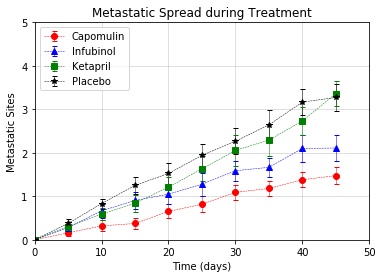

In [19]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

ax = plt.subplot(111)

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")


# Plot x-axis vs mean tumor volume values with error

ax.errorbar(x_axis, metasite_mean.loc["Capomulin", "Metastatic Sites"], yerr = metasite_stderror.loc["Capomulin", "Metastatic Sites"],
            fmt="o", color="Red", linestyle="--", label="Capomulin", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Infubinol", "Metastatic Sites"], yerr = metasite_stderror.loc["Infubinol", "Metastatic Sites"],
            fmt="^", color="Blue", linestyle="--", label="Infubinol", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Ketapril", "Metastatic Sites"], yerr = metasite_stderror.loc["Ketapril", "Metastatic Sites"],
            fmt="s", color="Green", linestyle="--", label="Ketapril", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Placebo", "Metastatic Sites"], yerr = metasite_stderror.loc["Placebo", "Metastatic Sites"],
            fmt="*", color="Black", linestyle="--", label="Placebo", linewidth=0.5, capsize=2.5)

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(0,5)

# Plotting graph
plt.show()



## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

group_df = merge_data_df.groupby(["Drug", "Timepoint"])
mice_count = group_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})
mice_count.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

mice_pivot = mice_count.reset_index().pivot(index="Timepoint", columns="Drug", values="Mouse Count")
mice_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


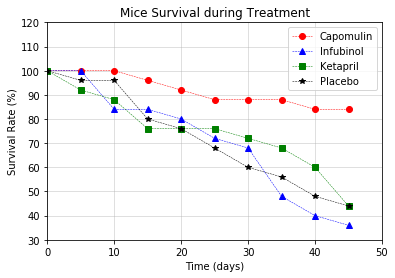

In [22]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Mice Survival during Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")


# Plot x-axis vs mean tumor volume values with error

plt.plot(x_axis, 100*mice_count.loc["Capomulin", "Mouse Count"]/25,
            marker="o", color="Red", linestyle="--", linewidth=0.5, label="Capomulin")
plt.plot(x_axis, 100*mice_count.loc["Infubinol", "Mouse Count"]/25,
            marker="^", color="Blue", linestyle="--", linewidth=0.5, label="Infubinol")
plt.plot(x_axis, 100*mice_count.loc["Ketapril", "Mouse Count"]/25, 
            marker="s", color="Green", linestyle="--", linewidth=0.5, label="Ketapril")
plt.plot(x_axis, 100*mice_count.loc["Placebo", "Mouse Count"]/25,
            marker="*", color="Black", linestyle="--", linewidth=0.5, label="Placebo")

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(30,120)

# Plotting graph
plt.show()


## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
# Display the data to confirm

tumor_pct_change =  100 * (pivot_table.iloc[-1] - pivot_table.iloc[0]) / pivot_table.iloc[0]
tumor_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

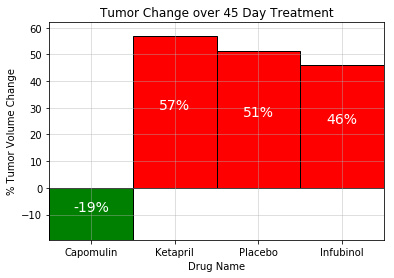

In [27]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure

def autolabel(rects, ax):
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)
        
        
# Plot the bar chart for percent change
fig, ax = plt.subplots()

x_axis = np.arange(0,4,1)
heights = [tumor_pct_change["Capomulin"], tumor_pct_change["Ketapril"], tumor_pct_change["Placebo"], tumor_pct_change["Infubinol"]]
labels = ["Capomulin", "Ketapril", "Placebo", "Infubinol"]
colors = []

# If the change in volume is positive, assign the color red, else green
for vols in heights:
    if vols >= 0:
        colors.append('r')
    else:
        colors.append('g')

barplot = ax.bar(x_axis, heights, width = 1, align='center', color = colors,
                 edgecolor = 'black', linewidth = 1, tick_label = labels)

# Add labeling
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("Drug Name")

# Add Gridlines
ax.grid(alpha = 0.5)

# Adjust axis
ax.set_xlim(-.5,3.5)
ax.set_ylim(min(heights), max(heights)+5)

# Add labels for the percentages
autolabel(barplot, ax)

plt.show()
   